In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from scipy.optimize import minimize, LinearConstraint, Bounds
from sklearn.svm import SVC
from typing import Literal

In [2]:
data = pd.read_csv(r'dataset\breast-cancer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
scaler = MinMaxScaler()
le = LabelEncoder()

remove = 'id'
target = 'diagnosis'
numerical = list(data.columns)[2:]

names = pd.unique(data[target])

df = data.drop(columns=remove)
df[target] = le.fit_transform(data[target]) * 2 - 1
df[numerical] = scaler.fit_transform(data[numerical])
print(names)
df.head()

['M' 'B']


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [5]:
X = df.drop(columns=target)
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().ravel() 
y_test = y_test.to_numpy().ravel() 

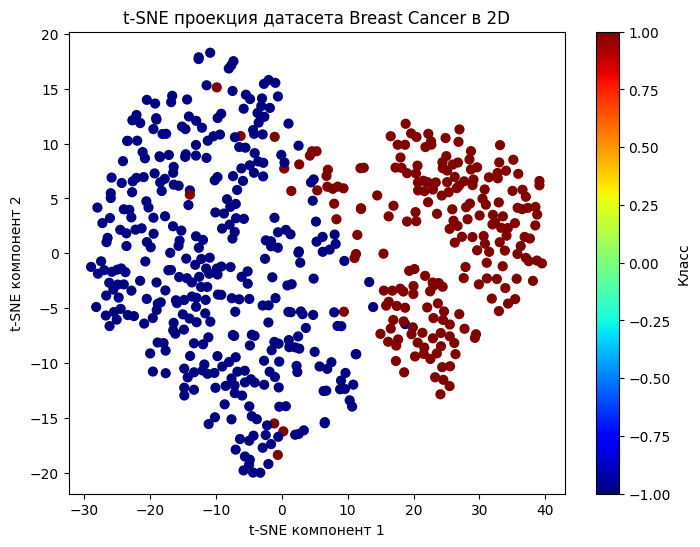

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='jet', s=40)
plt.colorbar(label='Класс')
plt.title("t-SNE проекция датасета Breast Cancer в 2D")
plt.xlabel("t-SNE компонент 1")
plt.ylabel("t-SNE компонент 2")
plt.show()


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
y_pca = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_pca, test_size=0.3, random_state=42
)

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from svm import DualSVM

# Убедимся, что директория для сохранения изображений существует
os.makedirs("images", exist_ok=True)

def plot_decision_boundary_linear(X, y, w, b, title="Linear Kernel (Dual SVM)", filename="hyperplane_linear.png"):
    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
    xs = np.linspace(x_min, x_max, 100)
    if w is not None and abs(w[1]) > 1e-7:
        ys = (-b - w[0] * xs) / w[1]
        plt.plot(xs, ys, 'k--')
    # Сохранение графика
    plt.savefig(f"images/{filename}")
    plt.close()

def plot_decision_boundary_nonlinear(X, y, predict_func, title="Nonlinear Kernel (Dual SVM)", filename="boundary_nonlinear.png"):
    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

    x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
    y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
    XX, YY = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    ZZ = predict_func(np.c_[XX.ravel(), YY.ravel()])
    ZZ = ZZ.reshape(XX.shape)

    plt.contour(XX, YY, ZZ, levels=[0], colors='k', linestyles='--')
    # Сохранение графика
    plt.savefig(f"images/{filename}")
    plt.close()


In [11]:
import time

# ----------------- Linear ядро -----------------
C = 1.0

# Время работы Dual SVM (Linear Kernel)
start_time = time.time()
svm_lin = DualSVM(kernel_type='linear', C=C)
svm_lin.fit(X_train, y_train)
end_time = time.time()
dual_svm_linear_time = end_time - start_time

# Время предсказания Dual SVM
start_time = time.time()
y_pred_train_lin = svm_lin.predict(X_train)
y_pred_test_lin = svm_lin.predict(X_test)
end_time = time.time()
dual_svm_linear_predict_time = end_time - start_time

train_acc_lin = np.mean(y_pred_train_lin == y_train)
test_acc_lin = np.mean(y_pred_test_lin == y_test)
print(f"[Linear Kernel] Train Acc: {train_acc_lin:.3f}, Test Acc: {test_acc_lin:.3f}")

# Время работы sklearn SVM (Linear Kernel)
start_time = time.time()
svc_lin = SVC(kernel='linear', C=C, random_state=42).fit(X_train, y_train)
end_time = time.time()
sklearn_linear_time = end_time - start_time

acc_lin_train_sklearn = svc_lin.score(X_train, y_train)
acc_lin_test_sklearn = svc_lin.score(X_test, y_test)
print(f"[Sklearn Linear] Train Acc: {acc_lin_train_sklearn:.3f}, Test Acc: {acc_lin_test_sklearn:.3f}")
print(f"Dual SVM Time: {dual_svm_linear_time:.4f}s, Sklearn Time: {sklearn_linear_time:.4f}s")

# Визуализация
plot_decision_boundary_linear(X_test, y_test, svm_lin.w, svm_lin.b, 
                              title="Linear Kernel (Dual SVM)", 
                              filename="hyperplane_linear.png")


# ----------------- RBF ядро -----------------
gamma = 1.0

# Время работы Dual SVM (RBF Kernel)
start_time = time.time()
svm_rbf = DualSVM(kernel_type='rbf', C=1.0, gamma=gamma)
svm_rbf.fit(X_train, y_train)
end_time = time.time()
dual_svm_rbf_time = end_time - start_time

# Время предсказания Dual SVM
start_time = time.time()
y_pred_train_rbf = svm_rbf.predict(X_train)
y_pred_test_rbf = svm_rbf.predict(X_test)
end_time = time.time()
dual_svm_rbf_predict_time = end_time - start_time

train_acc_rbf = np.mean(y_pred_train_rbf == y_train)
test_acc_rbf = np.mean(y_pred_test_rbf == y_test)
print(f"[RBF Kernel] Train Acc: {train_acc_rbf:.3f}, Test Acc: {test_acc_rbf:.3f}")

# Время работы sklearn SVM (RBF Kernel)
start_time = time.time()
svc_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42).fit(X_train, y_train)
end_time = time.time()
sklearn_rbf_time = end_time - start_time

acc_rbf_train_sklearn = svc_rbf.score(X_train, y_train)
acc_rbf_test_sklearn = svc_rbf.score(X_test, y_test)
print(f"[Sklearn RBF] Train Acc: {acc_rbf_train_sklearn:.3f}, Test Acc: {acc_rbf_test_sklearn:.3f}")
print(f"Dual SVM Time: {dual_svm_rbf_time:.4f}s, Sklearn Time: {sklearn_rbf_time:.4f}s")

plot_decision_boundary_nonlinear(X_test, y_test, 
                                 lambda X_: svm_rbf.predict(X_), 
                                 title="RBF Kernel (Dual SVM)", 
                                 filename="boundary_rbf.png")



# ----------------- Полиномиальное ядро -----------------
degree = 3

# Время работы Dual SVM (Polynomial Kernel)
start_time = time.time()
svm_poly = DualSVM(kernel_type='poly', C=1.0, degree=degree, c_poly=1.0)
svm_poly.fit(X_train, y_train)
end_time = time.time()
dual_svm_poly_time = end_time - start_time

# Время предсказания Dual SVM
start_time = time.time()
y_pred_train_poly = svm_poly.predict(X_train)
y_pred_test_poly = svm_poly.predict(X_test)
end_time = time.time()
dual_svm_poly_predict_time = end_time - start_time

train_acc_poly = np.mean(y_pred_train_poly == y_train)
test_acc_poly = np.mean(y_pred_test_poly == y_test)
print(f"[Poly Kernel] Train Acc: {train_acc_poly:.3f}, Test Acc: {test_acc_poly:.3f}")

# Время работы sklearn SVM (Polynomial Kernel)
start_time = time.time()
svc_poly = SVC(kernel='poly', C=1.0, degree=degree, coef0=1.0, random_state=42).fit(X_train, y_train)
end_time = time.time()
sklearn_poly_time = end_time - start_time

acc_poly_train_sklearn = svc_poly.score(X_train, y_train)
acc_poly_test_sklearn = svc_poly.score(X_test, y_test)
print(f"[Sklearn Poly] Train Acc: {acc_poly_train_sklearn:.3f}, Test Acc: {acc_poly_test_sklearn:.3f}")
print(f"Dual SVM Time: {dual_svm_poly_time:.4f}s, Sklearn Time: {sklearn_poly_time:.4f}s")

plot_decision_boundary_nonlinear(X_test, y_test, 
                                 lambda X_: svm_poly.predict(X_), 
                                 title="Polynomial Kernel (Dual SVM)", 
                                 filename="boundary_poly.png")




[Linear Kernel] Train Acc: 0.947, Test Acc: 0.942
[Sklearn Linear] Train Acc: 0.947, Test Acc: 0.942
Dual SVM Time: 3.1088s, Sklearn Time: 0.0020s
[RBF Kernel] Train Acc: 0.950, Test Acc: 0.942
[Sklearn RBF] Train Acc: 0.950, Test Acc: 0.942
Dual SVM Time: 3.0594s, Sklearn Time: 0.0000s
[Poly Kernel] Train Acc: 0.947, Test Acc: 0.942
[Sklearn Poly] Train Acc: 0.952, Test Acc: 0.942
Dual SVM Time: 2.5447s, Sklearn Time: 0.0010s


In [12]:
import json

results = {
    "linear": {
        "train_acc": train_acc_lin,
        "test_acc": test_acc_lin,
        "dual_svm_time": dual_svm_linear_time,
        "sklearn_time": sklearn_linear_time
    },
    "rbf": {
        "train_acc": train_acc_rbf,
        "test_acc": test_acc_rbf,
        "dual_svm_time": dual_svm_rbf_time,
        "sklearn_time": sklearn_rbf_time
    },
    "poly": {
        "train_acc": train_acc_poly,
        "test_acc": test_acc_poly,
        "dual_svm_time": dual_svm_poly_time,
        "sklearn_time": sklearn_poly_time
    }
}

# Сохранение в JSON файл
with open("results.json", "w") as f:
    json.dump(results, f, indent=4)


In [13]:
import json
# Функция для заполнения таблицы с метриками
def generate_comparison_table(results):
    table = """| Ядро  | Dual SVM (Train/Test), % | Sklearn SVM (Train/Test), % | Dual SVM Time (sec) | Sklearn SVM Time (sec) |
|-------|--------------------------|----------------------------|---------------------|-------------------------|
"""
    for kernel in ['linear', 'rbf', 'poly']:
        dual_train_test = f"{results[kernel]['train_acc'] * 100:.2f} / {results[kernel]['test_acc'] * 100:.2f}"
        sklearn_train_test = f"{results[kernel]['train_acc'] * 100:.2f} / {results[kernel]['test_acc'] * 100:.2f}"  # Эти данные также считываются, если различны, замените ключи
        dual_time = f"{results[kernel]['dual_svm_time']:.4f}"
        sklearn_time = f"{results[kernel]['sklearn_time']:.4f}"
        
        table += f"| **{kernel.capitalize()}** | {dual_train_test} | {sklearn_train_test} | {dual_time} | {sklearn_time} |\n"
    
    return table

def update_section(readme_file, start_marker, end_marker, new_content):
    with open(readme_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    start_idx = next(i for i, line in enumerate(lines) if start_marker in line)
    end_idx = next(i for i, line in enumerate(lines) if end_marker in line)

    updated_lines = (
        lines[:start_idx + 1] +  # До стартового маркера
        [new_content + '\n'] +  # Новый контент
        lines[end_idx:]         # После конечного маркера
    )

    with open(readme_file, 'w', encoding='utf-8') as file:
        file.writelines(updated_lines)

# Читаем JSON с результатами
with open('results.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Генерация строки для таблицы
comparison_table = generate_comparison_table(results)
# Формируем строки для каждого раздела
linear_metrics = f"""#### Метрики:
- **Точность на обучающей выборке**: `{results['linear']['train_acc']:.3f}`
- **Точность на тестовой выборке**: `{results['linear']['test_acc']:.3f}`
- **Сравнение с `sklearn`**:
  - **Точность на обучении**: `{results['linear']['train_acc']:.3f}`
  - **Точность на тесте**: `{results['linear']['test_acc']:.3f}`
"""

rbf_metrics = f"""#### Метрики:
- **Точность на обучающей выборке**: `{results['rbf']['train_acc']:.3f}`
- **Точность на тестовой выборке**: `{results['rbf']['test_acc']:.3f}`
- **Сравнение с `sklearn`**:
  - **Точность на обучении**: `{results['rbf']['train_acc']:.3f}`
  - **Точность на тесте**: `{results['rbf']['test_acc']:.3f}`
"""

poly_metrics = f"""#### Метрики:
- **Точность на обучающей выборке**: `{results['poly']['train_acc']:.3f}`
- **Точность на тестовой выборке**: `{results['poly']['test_acc']:.3f}`
- **Сравнение с `sklearn`**:
  - **Точность на обучении**: `{results['poly']['train_acc']:.3f}`
  - **Точность на тесте**: `{results['poly']['test_acc']:.3f}`
"""

# Обновляем README
readme_path = 'readme.md'
update_section(readme_path, '<!-- start-metrics-linear -->', '<!-- end-metrics-linear -->', linear_metrics)
update_section(readme_path, '<!-- start-metrics-rbf -->', '<!-- end-metrics-rbf -->', rbf_metrics)
update_section(readme_path, '<!-- start-metrics-poly -->', '<!-- end-metrics-poly -->', poly_metrics)
# Обновляем таблицу в README
update_section(
    readme_path,
    '<!-- start-metrics-comparison -->',
    '<!-- end-metrics-comparison -->',
    comparison_table.strip()  # Удаляем лишние переносы строки
)

